In [ ]:
from keras.layers import SimpleRNN

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding

In [ ]:
model=Sequential()
model.add(Embedding(1000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          32000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


## BOYUTLANDIRILMIŞ RNN


In [ ]:
model=Sequential()
model.add(Embedding(1000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


## Ardışık RNN katmanları

In [ ]:
model=Sequential()
model.add(Embedding(1000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 40,320
Trainable params: 40,320
Non-trainable params: 0
_________________________________________________________________


## IMDB VERİ KÜMESİ


In [ ]:
import tensorflow as tf
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [ ]:
num_features=1000
maxlen=500
bacthsize=32

In [ ]:
print("Load data")
(input_train,y_train),(input_test,y_test)=imdb.load_data(num_words=num_features)

print(len(input_train),"eğitim dizisi",input_train.shape)
print(len(input_test),"test dizisi",input_test.shape)

Load data
17464789/17464789 [==============================] - 0s 0us/step
25000 eğitim dizisi (25000,)
25000 test dizisi (25000,)


In [ ]:
print("pad sequence (sample x train)")
input_train=sequence.pad_sequences(input_train,maxlen=maxlen)
input_test=sequence.pad_sequences(input_test,maxlen=maxlen)
print(len(input_train),"eğitim dizisi",input_train.shape)
print(len(input_test),"test dizisi",input_test.shape)

pad sequence (sample x train)
25000 eğitim dizisi (25000, 500)
25000 test dizisi (25000, 500)


In [ ]:
from keras.layers import Dense
from keras import layers


## BASİT RNN


In [ ]:
model=Sequential()
model.add(Embedding(num_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 34,113
Trainable params: 34,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

histort=model.fit(input_train,y_train,
                  epochs=10,
                  batch_size=128,
                  validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 38s 232ms/step - loss: 0.6615 - accuracy: 0.5912 - val_loss: 0.5435 - val_accuracy: 0.7528
Epoch 2/10
157/157 [==============================] - 54s 346ms/step - loss: 0.4944 - accuracy: 0.7715 - val_loss: 0.4557 - val_accuracy: 0.8018
Epoch 3/10
157/157 [==============================] - 58s 368ms/step - loss: 0.4290 - accuracy: 0.8098 - val_loss: 0.5184 - val_accuracy: 0.7370
Epoch 4/10
157/157 [==============================] - 42s 270ms/step - loss: 0.3973 - accuracy: 0.8284 - val_loss: 0.5030 - val_accuracy: 0.7660
Epoch 5/10
157/157 [==============================] - 34s 212ms/step - loss: 0.3669 - accuracy: 0.8446 - val_loss: 0.4827 - val_accuracy: 0.7628
Epoch 6/10
157/157 [==============================] - 33s 211ms/step - loss: 0.3397 - accuracy: 0.8566 - val_loss: 0.4753 - val_accuracy: 0.7826
Epoch 7/10
157/157 [==============================] - 29s 184ms/step - loss: 0.3048 - accuracy: 0.8735 - val_loss: 0.5195 - val_ac

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
acc=histort.history["accuracy"]
val_acc=histort.history["val_accuracy"]
loss=histort.history["loss"]
val_loss=histort.history["val_loss"]

In [ ]:
epochs=range(1,len(acc)+1)

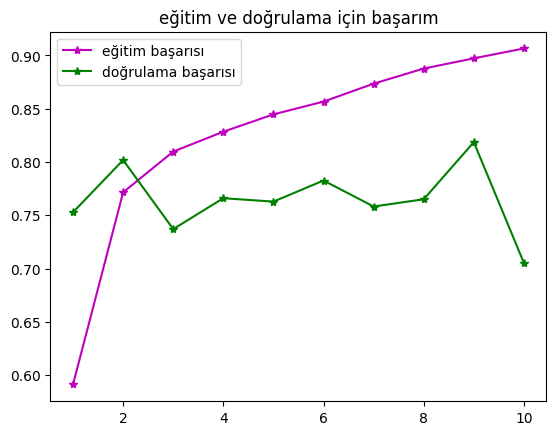

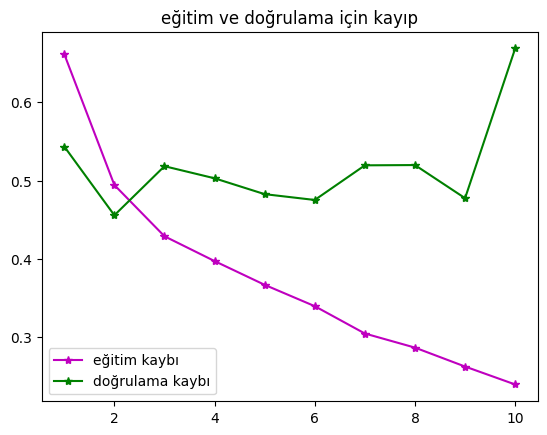

In [ ]:
plt.plot(epochs,acc,"m*-",label="eğitim başarısı")
plt.plot(epochs,val_acc,"g*-",label="doğrulama başarısı")
plt.title("eğitim ve doğrulama için başarım")
plt.legend()
plt.figure()
plt.plot(epochs,loss,"m*-",label="eğitim kaybı")
plt.plot(epochs,val_loss,"g*-",label="doğrulama kaybı")
plt.title("eğitim ve doğrulama için kayıp")
plt.legend()

## RNN WITH LSDM

In [ ]:
model=Sequential()
model.add(layers.Embedding(num_features,32))
model.add(layers.Bidirectional(layers.LSTM(64)))
model.add(Dense(1,activation="sigmoid"))#TANH DAHA İYİ
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          32000     
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 48,705
Trainable params: 48,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

history=model.fit(input_train,y_train,
                  epochs=10,
                  batch_size=128,
                  validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 145s 891ms/step - loss: 0.6378 - accuracy: 0.6258 - val_loss: 0.4921 - val_accuracy: 0.8020
Epoch 2/10
157/157 [==============================] - 124s 792ms/step - loss: 0.4424 - accuracy: 0.8074 - val_loss: 0.4202 - val_accuracy: 0.8144
Epoch 3/10
157/157 [==============================] - 130s 832ms/step - loss: 0.3734 - accuracy: 0.8418 - val_loss: 0.4065 - val_accuracy: 0.8368
Epoch 4/10
157/157 [==============================] - 121s 773ms/step - loss: 0.3526 - accuracy: 0.8546 - val_loss: 0.4555 - val_accuracy: 0.7816
Epoch 5/10
157/157 [==============================] - 122s 779ms/step - loss: 0.3377 - accuracy: 0.8609 - val_loss: 0.4287 - val_accuracy: 0.8358
Epoch 6/10
157/157 [==============================] - 126s 804ms/step - loss: 0.3303 - accuracy: 0.8637 - val_loss: 0.3436 - val_accuracy: 0.8560
Epoch 7/10
157/157 [==============================] - 120s 764ms/step - loss: 0.3194 - accuracy: 0.8680 - val_loss: 0.4122 -

In [ ]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]

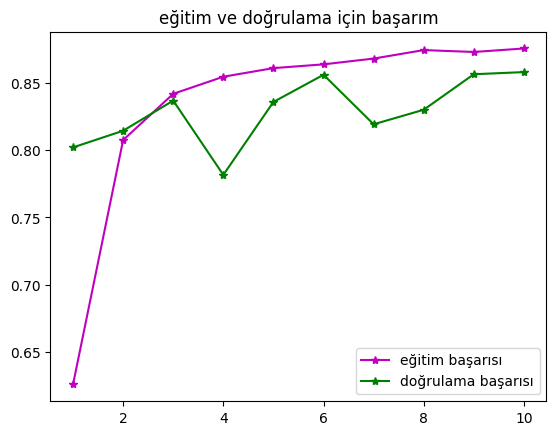

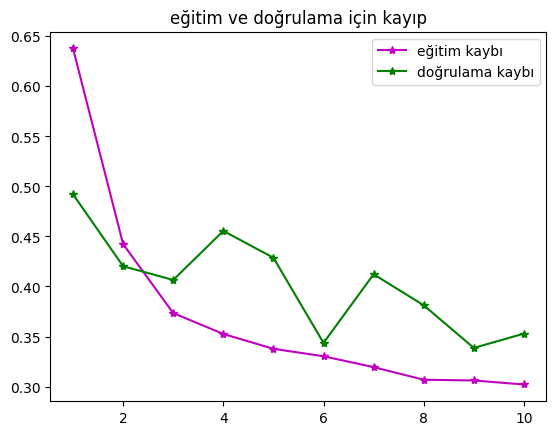

In [ ]:
plt.plot(epochs,acc,"m*-",label="eğitim başarısı")
plt.plot(epochs,val_acc,"g*-",label="doğrulama başarısı")
plt.title("eğitim ve doğrulama için başarım")
plt.legend()
plt.figure()
plt.plot(epochs,loss,"m*-",label="eğitim kaybı")
plt.plot(epochs,val_loss,"g*-",label="doğrulama kaybı")
plt.title("eğitim ve doğrulama için kayıp")
plt.legend()